In [2]:
%display plain
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [3]:
var("x y x0 y0 t")

(x, y, x0, y0, t)

In [4]:
R.<x, y> = RIF[] 

In [5]:
from ulbc.systems import *
from flowstar.reachability import IntegrationMethod
from ulbc.tests.test_systems import solution
from ulbc.interval_utils import intervals_approx_eq
from ulbc.tests.test_reach_trees import space_domain_approx_eq

In [6]:
solution(x0, y0, t)

(x0*cos(t) - y0*sin(t), y0*cos(t) + x0*sin(t))

In [7]:
def system(x0, y0, *args, **kwargs):
    return System(R, (x, y), (x0, y0), (-y, x),
        *args, **kwargs)

In [9]:
system(1, 1)

System(R, (x, y), [1, 1], (-y, x), varmap=bidict({'x': x, 'y': y}))

In [10]:
def reach(x0, y0, duration):
    return system(x0, y0).reach(duration, order=3, integration_method=IntegrationMethod.LOW_DEGREE)

In [11]:
reach(1, 1, 2)(RIF(1.4, 1.5))

calling reach with y0 = ['[1.0000000000000000 .. 1.0000000000000000]', '[1.0000000000000000 .. 1.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.0]
C = [1.0..1.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


[-0.9?, 1.1?]

In [12]:
from functools import partial

In [13]:
r = reach(RIF(1,1.2), RIF(1.5,1.6), 15)
g = partial(solution, RIF(1,1.2), RIF(1.5,1.6))

calling reach with y0 = ['[1.0000000000000000 .. 1.2000000000000000]', '[1.5000000000000000 .. 1.6000000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.2]
C = [1.5..1.6]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


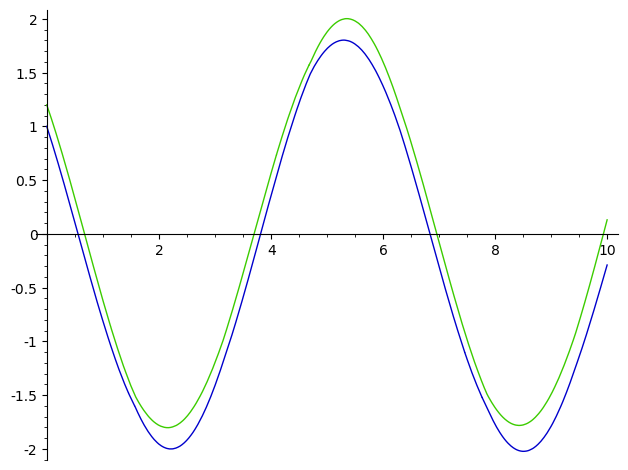

In [14]:
plot((lambda t: r(t)[0].lower(), lambda t: r(t)[0].upper()), 0, 10)

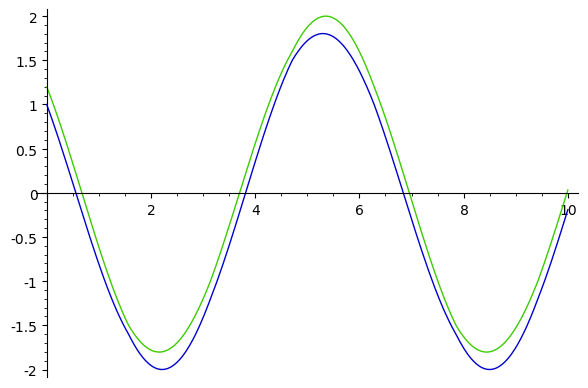

In [15]:
plot((lambda t: RIF(g(t)[0]).lower(), lambda t: RIF(g(t)[0]).upper()), 0, 10)

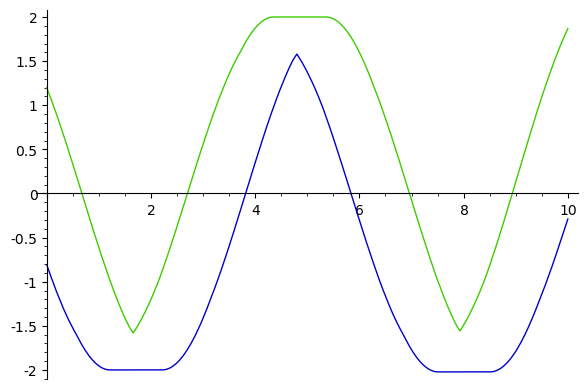

In [16]:
plot((lambda t: r(t + RIF(0, 1))[0].lower(), lambda t: r(t + RIF(0, 1))[0].upper()), 0, 10)

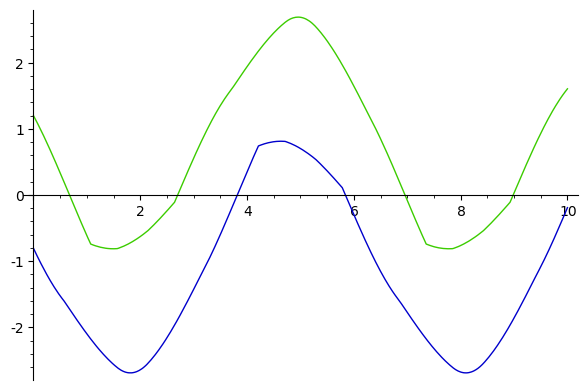

In [18]:
plot((lambda t: RIF(g(t + RIF(0, 1))[0]).lower(), lambda t: RIF(g(t + RIF(0, 1))[0]).upper()), 0, 10)

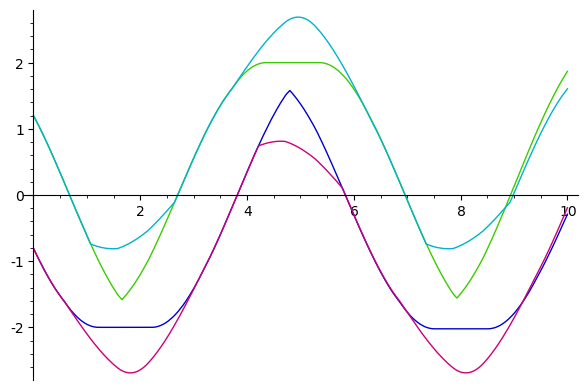

In [19]:
plot((lambda t: r(t + RIF(0, 1))[0].lower(), lambda t: r(t + RIF(0, 1))[0].upper(), lambda t: RIF(g(t + RIF(0, 1))[0]).lower(), lambda t: RIF(g(t + RIF(0, 1))[0]).upper()), 0, 10)

In [20]:
#@interact(
#    x0=slider(0, 3),
#    y0=slider(0, 3),
#)
#def _(x0, y0):
#    r = reach(x0, y0, 10 + 2e-3)
#    
#    return plot((r, partial(solution, x0, y0)), (0, 10))

In [17]:
intervals_approx_eq(
    g(5),
    r(5),
    0.1
)

xs = ['[1.7220485974579338 .. 1.8746734620168935]', '[-0.72521585140092704 .. -0.50506477792197623]']
ys = ['[1.7210724028621287 .. 1.8756504079300552]', '[-0.72646414154433892 .. -0.50381673807642102]']


True